# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

**Important Note:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

This notebook provides an overview of Dandiset 001375, which contains data from a pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity.

You can find the Dandiset here: https://dandiarchive.org/dandiset/001375

This notebook will cover the following:

1.  Loading the Dandiset metadata using the DANDI API.
2.  Listing the assets in the Dandiset.
3.  Loading and visualizing data from an NWB file in the Dandiset.

## Required Packages

The following packages are required to run this notebook:

*   dandi
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: https://dandiarchive.org/dandiset/001375")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nAll assets:")
for asset in assets:
    print(f"- {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375

Found 3 assets in the dataset

All assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## Loading an NWB File and its Metadata

In this section, we will load one of the NWB files in the Dandiset and display some of its metadata. We will load the following file:

`sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`

The URL for this asset is:

`https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`

You can explore this file on neurosift here: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(nwb)
print(nwb.session_description) # (str) mouse running laps in virtual hallway
print(nwb.identifier) # (str) MS13B
print(nwb.session_start_time) # (datetime) 2024-07-25T19:00:00-07:00
# print(nwb.file_create_date) # Omit due to future date anomaly

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x140475423980112
Fields:
  acquisition: {
    time_series <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    silicon probe array <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    shank1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    shank2 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2025, 4, 5, 16, 50, 15, 663983, tzinfo=tzoffset(None, -25200))]
  identifier: MS13B
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  session_description: mouse running laps in virtual hallway
  session_start_time: 2024-07-25 19:00:00-07:00
  subject: subject pynwb.file.Subject at 0x140475423928336
Fields:
  age: P90D
  age__reference: birth
  description: medial septum DREADD to suppress GABA interneurons
  sex: M
  species: Mus musculus
  subject_id: MS13B

  timestamps_reference_time: 2024-07-25 19:00:00-07:00
  trials: trials <class 'pynwb.epoch.T

## Loading and Visualizing Time Series Data

In this section, we will load and visualize a small segment of the time series data from the NWB file. This data represents the raw electrophysiology recordings.

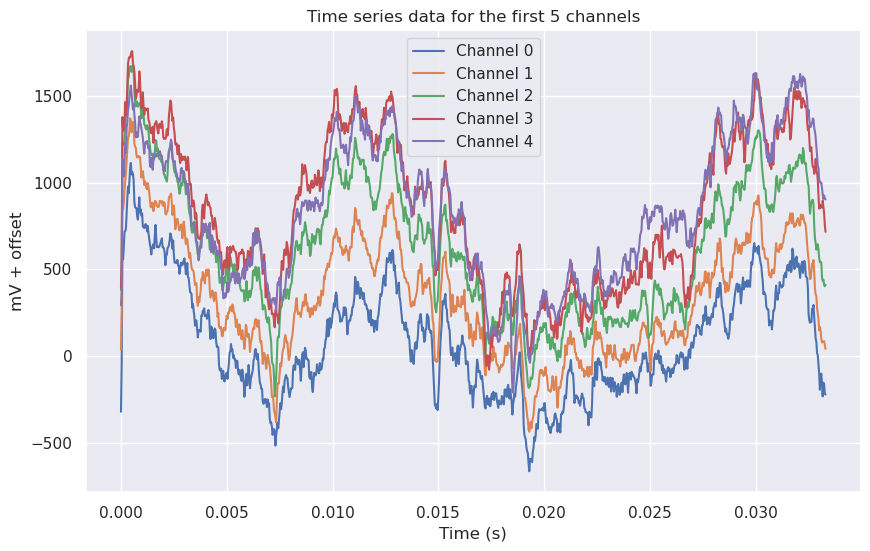

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Extract a small segment of the time_series.data
time_series = nwb.acquisition["time_series"]
data = time_series.data[:1000, :5]  # First 1000 time points and first 5 channels

# Get the sampling rate
if hasattr(time_series, 'rate'):
    rate = time_series.rate
else:
    rate = 1.0  # Default rate if not available

# Generate time axis
time = np.arange(0, len(data)) / rate

# Plot the data
plt.figure(figsize=(10, 6))
for i in range(data.shape[1]):
    plt.plot(time, data[:, i] + i * 100, label=f"Channel {i}") # adding offset for each channel
plt.xlabel("Time (s)")
plt.ylabel("mV + offset")
plt.title("Time series data for the first 5 channels")
plt.legend()
plt.show()
plt.close()

# Summary and Future Directions

This notebook has provided a basic introduction to exploring Dandiset 001375. We have shown how to load the Dandiset metadata, list the assets, load an NWB file, and visualize some of the time series data.

Future directions for analysis could include:

*   Exploring other NWB files in the Dandiset.
*   Loading and analyzing spike times.
*   Performing more advanced signal processing and analysis on the electrophysiology data.
*   Investigating the behavioral data.